In [2]:
import keras.utils as ku; import keras.models as km; import keras.layers as kl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
INPUT_DIR = './data/'

## Import data and manipulate

In [47]:
df_train = pd.read_csv( INPUT_DIR + 'train.csv')
df_test = pd.read_csv( INPUT_DIR + 'test.csv')
print(df_train.columns)

# dropping certain features
features2drop = ['PassengerId','Ticket','Name']

df_train = df_train.drop( columns = features2drop ); df_test = df_test.drop( columns = features2drop )

# binary version of certain columns
mapping_gender = {'male': 1, 'female': 0}; mapping_nan = { np.nan : 0 }

df_train = df_train.replace({'Sex': mapping_gender, 'Age': mapping_nan, 'Fare' : mapping_nan, 'Cabin' : mapping_nan}).convert_objects()
df_test = df_test.replace({'Sex': mapping_gender, 'Age': mapping_nan, 'Fare' : mapping_nan, 'Cabin' : mapping_nan}).convert_objects()

# one-hot encoding of certain columns
one_hot = ['Pclass','Embarked']
df_train = pd.get_dummies(df_train, columns = one_hot ); df_test = pd.get_dummies(df_test, columns = one_hot )

# whether or not they had a cabin (in the data)
df_train['Cabin'] = (df_train['Cabin'] != 0).astype(int); df_test['Cabin'] = (df_test['Cabin'] != 0).astype(int);

# get final list of features
list_features = list(df_train.columns)
list_features.remove('Survived')
print(list_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]
/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [48]:
# split data into validate, train
x_train, x_validate, y_train, y_validate = train_test_split(df_train.as_matrix( columns = list_features), df_train.as_matrix(columns = ['Survived']), test_size=0.25)

# make test data
x_test = df_test.as_matrix(columns = list_features)

/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Neural Network 1

In [77]:
def network_1():

    input_data = kl.Input(shape = (np.shape(x_train)[1],), name='input')

    x = kl.Dense(10, name = 'hidden'+str(1), activation = 'tanh')(input_data)

    x = kl.Dense(10, name = 'hidden'+str(2), activation = 'tanh')(x)
    
    x = kl.Dense(10, name = 'hidden'+str(3), activation = 'tanh')(x)

    output = kl.Dense(1, name='output', activation='sigmoid')(x)

    model = km.Model(inputs = input_data, outputs = output)

    model.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = 'binary_crossentropy')
    
    return model

#### Neural Network 2

In [78]:
def network_2():

    input_data = kl.Input(shape = (np.shape(x_train)[1],), name='input')

    x = kl.Dense(30, name = 'hidden'+str(1), activation = 'tanh')(input_data)

    output = kl.Dense(1, name='output', activation='sigmoid')(x)

    model = km.Model(inputs = input_data, outputs = output)

    model.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = 'binary_crossentropy')
    
    return model

In [79]:
model = network_1()

fit = model.fit(x_train, y_train, epochs = 400, batch_size = 64, verbose=1)

Epoch 1/400
668/668 [==============================] - 1s 2ms/step - loss: 0.6572 - acc: 0.6078
Epoch 2/400
668/668 [==============================] - 0s 70us/step - loss: 0.6515 - acc: 0.6078
Epoch 3/400
668/668 [==============================] - 0s 69us/step - loss: 0.6475 - acc: 0.6078
Epoch 4/400
668/668 [==============================] - 0s 69us/step - loss: 0.6446 - acc: 0.5973
Epoch 5/400
668/668 [==============================] - 0s 75us/step - loss: 0.6426 - acc: 0.5913
Epoch 6/400
668/668 [==============================] - 0s 62us/step - loss: 0.6413 - acc: 0.5928
Epoch 7/400
668/668 [==============================] - 0s 64us/step - loss: 0.6402 - acc: 0.5973
Epoch 8/400
668/668 [==============================] - 0s 64us/step - loss: 0.6395 - acc: 0.5958
Epoch 9/400
668/668 [==============================] - 0s 68us/step - loss: 0.6389 - acc: 0.5958
Epoch 10/400
668/668 [==============================] - 0s 81us/step - loss: 0.6384 - acc: 0.5958
Epoch 11/400
668/668 [========

668/668 [==============================] - 0s 67us/step - loss: 0.6225 - acc: 0.6437
Epoch 85/400
668/668 [==============================] - 0s 74us/step - loss: 0.6226 - acc: 0.6512
Epoch 86/400
668/668 [==============================] - 0s 82us/step - loss: 0.6223 - acc: 0.6407
Epoch 87/400
668/668 [==============================] - 0s 68us/step - loss: 0.6221 - acc: 0.6542
Epoch 88/400
668/668 [==============================] - 0s 66us/step - loss: 0.6218 - acc: 0.6587
Epoch 89/400
668/668 [==============================] - 0s 79us/step - loss: 0.6218 - acc: 0.6407
Epoch 90/400
668/668 [==============================] - 0s 66us/step - loss: 0.6215 - acc: 0.6437
Epoch 91/400
668/668 [==============================] - 0s 65us/step - loss: 0.6213 - acc: 0.6572
Epoch 92/400
668/668 [==============================] - 0s 80us/step - loss: 0.6212 - acc: 0.6497
Epoch 93/400
668/668 [==============================] - 0s 67us/step - loss: 0.6210 - acc: 0.6587
Epoch 94/400
668/668 [===========

668/668 [==============================] - 0s 68us/step - loss: 0.6025 - acc: 0.6826
Epoch 167/400
668/668 [==============================] - 0s 71us/step - loss: 0.6024 - acc: 0.6871
Epoch 168/400
668/668 [==============================] - 0s 66us/step - loss: 0.6021 - acc: 0.6841
Epoch 169/400
668/668 [==============================] - 0s 72us/step - loss: 0.6012 - acc: 0.6886
Epoch 170/400
668/668 [==============================] - 0s 72us/step - loss: 0.6010 - acc: 0.6826
Epoch 171/400
668/668 [==============================] - 0s 72us/step - loss: 0.6000 - acc: 0.6886
Epoch 172/400
668/668 [==============================] - 0s 69us/step - loss: 0.5996 - acc: 0.6886
Epoch 173/400
668/668 [==============================] - 0s 66us/step - loss: 0.6000 - acc: 0.6931
Epoch 174/400
668/668 [==============================] - 0s 75us/step - loss: 0.6001 - acc: 0.6931
Epoch 175/400
668/668 [==============================] - 0s 78us/step - loss: 0.5987 - acc: 0.6961
Epoch 176/400
668/668 [=

668/668 [==============================] - 0s 67us/step - loss: 0.5740 - acc: 0.6991
Epoch 249/400
668/668 [==============================] - 0s 68us/step - loss: 0.5755 - acc: 0.7021
Epoch 250/400
668/668 [==============================] - 0s 67us/step - loss: 0.5718 - acc: 0.7006
Epoch 251/400
668/668 [==============================] - 0s 78us/step - loss: 0.5741 - acc: 0.7036
Epoch 252/400
668/668 [==============================] - 0s 75us/step - loss: 0.5729 - acc: 0.6976
Epoch 253/400
668/668 [==============================] - 0s 75us/step - loss: 0.5735 - acc: 0.7006
Epoch 254/400
668/668 [==============================] - 0s 67us/step - loss: 0.5743 - acc: 0.6991
Epoch 255/400
668/668 [==============================] - 0s 70us/step - loss: 0.5722 - acc: 0.7051
Epoch 256/400
668/668 [==============================] - 0s 64us/step - loss: 0.5721 - acc: 0.7051
Epoch 257/400
668/668 [==============================] - 0s 66us/step - loss: 0.5715 - acc: 0.7006
Epoch 258/400
668/668 [=

668/668 [==============================] - 0s 62us/step - loss: 0.5546 - acc: 0.7126
Epoch 331/400
668/668 [==============================] - 0s 75us/step - loss: 0.5535 - acc: 0.7111
Epoch 332/400
668/668 [==============================] - 0s 67us/step - loss: 0.5531 - acc: 0.7066
Epoch 333/400
668/668 [==============================] - 0s 74us/step - loss: 0.5539 - acc: 0.7051
Epoch 334/400
668/668 [==============================] - 0s 71us/step - loss: 0.5566 - acc: 0.7096
Epoch 335/400
668/668 [==============================] - 0s 65us/step - loss: 0.5519 - acc: 0.7066
Epoch 336/400
668/668 [==============================] - 0s 69us/step - loss: 0.5496 - acc: 0.7021
Epoch 337/400
668/668 [==============================] - 0s 72us/step - loss: 0.5533 - acc: 0.7096
Epoch 338/400
668/668 [==============================] - 0s 71us/step - loss: 0.5499 - acc: 0.6991
Epoch 339/400
668/668 [==============================] - 0s 72us/step - loss: 0.5505 - acc: 0.7051
Epoch 340/400
668/668 [=

Text(0, 0.5, 'Accuracy')

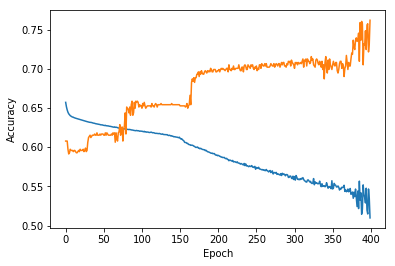

In [81]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch'); plt.ylabel('Error Loss')

plt.plot(fit.history['acc'])
plt.xlabel('Epoch'); plt.ylabel('Accuracy')


In [82]:
score = model.evaluate(x_validate, y_validate)
print( "The validation score is " + str(score) )

223/223 [==============================] - 0s 2ms/step
The validation score is [0.5745960294933062, 0.7174887868320995]


Now we need to set a threshold above which predictions are 1, and below which predictions are 0.

Text(0, 0.5, 'Frequency')

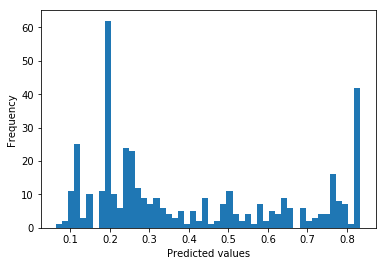

In [83]:
y_test = model.predict(x_test)
plt.hist(y_test, bins=50)
plt.xlabel('Predicted values'); plt.ylabel('Frequency')

In [84]:
threshold = 0.5 # from the graph above. Can vary
y_test[ y_test > threshold] = int(1); y_test[ y_test <= threshold] = int(0)
df_test_raw = pd.read_csv( INPUT_DIR + 'test.csv')
df_y_test = pd.DataFrame({'PassengerId' : df_test_raw.as_matrix(columns=['PassengerId'])[:,0],'Survived' : y_test[:,0].astype(int)})
df_y_test.to_csv('survival_predictions.csv', index = False)

/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
